<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF-495 - Modelado Computacional Aplicado </h1>
    <h2> Prof. Claudio Torres, Ph.D. </h2>
    <h2> Version: 1.02</h2>
</center>

In [1]:
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt
from ipywidgets import interact, interact_manual
from scipy import optimize
from scipy.linalg import null_space
plt.style.use('ggplot')

import matplotlib as mpl
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

import sympy as sym
sym.init_printing()

# Section 3.2.1 Prelude: A discrete-time compartment model

## Example 0

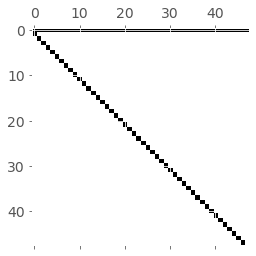

In [2]:
# Delta_t = 1 month
N = 48
np.random.seed(0)

# Buiding transition matrix
betas = np.abs(np.random.random(N))*0.7
mus = np.abs(np.random.random(N-1))*0.9
R = np.diag(1-mus,-1)
R[0,:] = betas

plt.figure()
plt.spy(R)
plt.show()

In [3]:
# Computing the eigenvalues of the matrix.
# Recall that if it has, in modulus, at least one eigenvalues larger than 1, 
# it means there will be an overpopulation.
# On the other hand, if the modulus of all eigenvalues are less than 1, there will be extintion.
# So, what is the sweet spot?
out = linalg.eig(R)
np.abs(out[0])

array([1.04698109, 0.62664669, 0.62664669, 0.61646965, 0.61646965,
       0.52708515, 0.52708515, 0.60153185, 0.60153185, 0.49642349,
       0.49642349, 0.46523504, 0.46523504, 0.51305685, 0.51305685,
       0.62141177, 0.62141177, 0.52042461, 0.52042461, 0.5221308 ,
       0.5221308 , 0.60573191, 0.60573191, 0.51882498, 0.51882498,
       0.51678951, 0.51678951, 0.6017966 , 0.6017966 , 0.53206932,
       0.53206932, 0.61224488, 0.61224488, 0.52322317, 0.52322317,
       0.62581102, 0.62581102, 0.51417166, 0.51417166, 0.57298316,
       0.57298316, 0.52744759, 0.4868062 , 0.4868062 , 0.46785103,
       0.46785103, 0.22854736, 0.22854736])

In [4]:
def fish_population_evolution(k=100,rho=0.7):
    np.random.seed(0)
    betas = np.abs(np.random.random(N))*rho
    mus = np.abs(np.random.random(N-1))*0.9
    R = np.diag(1-mus,-1)
    R[0,:] = betas
    
    p0 = np.ones(N)
    p1 = np.zeros_like(p0)
    for i in range(k):
        p1 = R @ p0
        p0 = p1
    plt.figure(figsize=(8,8))
    
    out = linalg.eig(R)
    print(np.abs(out[0]))
    
    plt.title(r'$\rho=$'+str(rho)+r', $\max_i |\lambda_i|=$'+str(np.max(np.abs(out[0]))))
    plt.semilogy(np.arange(1,49),p1,'.',label='$p_k(t)$')
    plt.legend(loc='best')
    plt.xlabel('$k$')
    plt.grid(True)
    ax = plt.gca()
    ax.set_xticks([1,12,24,36,48])
    plt.show()

# Can you find the sweet spot manually?

In [5]:
interact(fish_population_evolution, k = (1,10000,1), rho=(0,1,0.001))

interactive(children=(IntSlider(value=100, description='k', max=10000, min=1), FloatSlider(value=0.7, descript…

<function __main__.fish_population_evolution(k=100, rho=0.7)>

# Can you find the sweet spot automatically?

[1.         0.62691154 0.62691154 0.61580272 0.61580272 0.52705791
 0.52705791 0.60017563 0.60017563 0.49641187 0.49641187 0.46523535
 0.46523535 0.51302236 0.51302236 0.61860507 0.61860507 0.5203977
 0.5203977  0.52210806 0.52210806 0.6034261  0.6034261  0.51877376
 0.51877376 0.51681592 0.51681592 0.59974021 0.59974021 0.53193462
 0.53193462 0.60951865 0.60951865 0.52309702 0.52309702 0.62243917
 0.62243917 0.5141885  0.5141885  0.57138327 0.57138327 0.5271306
 0.48680426 0.48680426 0.46785384 0.46785384 0.22854736 0.22854736]


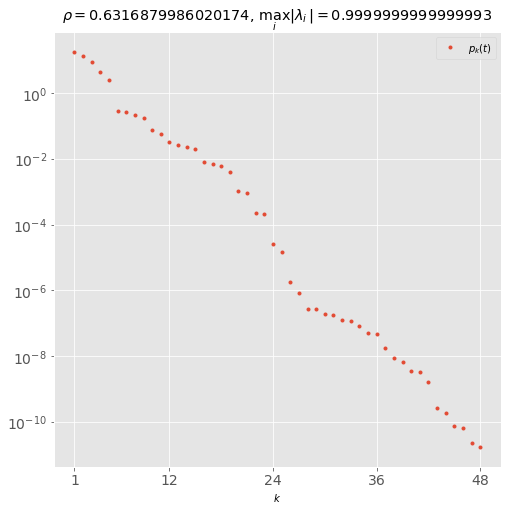

In [6]:
def fish_population_evolution_sweet_spot(rho): 
    np.random.seed(0)
    betas = np.abs(np.random.random(N))*rho
    mus = np.abs(np.random.random(N-1))*0.9
    R = np.diag(1-mus,-1)
    R[0,:] = betas
    out = linalg.eig(R)
    return 1-np.max(np.abs(out[0]))

# Finding the root
root = optimize.newton(fish_population_evolution_sweet_spot, 0.7)
# Plotting the outcome of 10000 iterations with the root found.
fish_population_evolution(k=10000,rho=root)

## Example 1
Just plotting $\beta_k$ and $m_k$.

<Figure size 360x720 with 0 Axes>

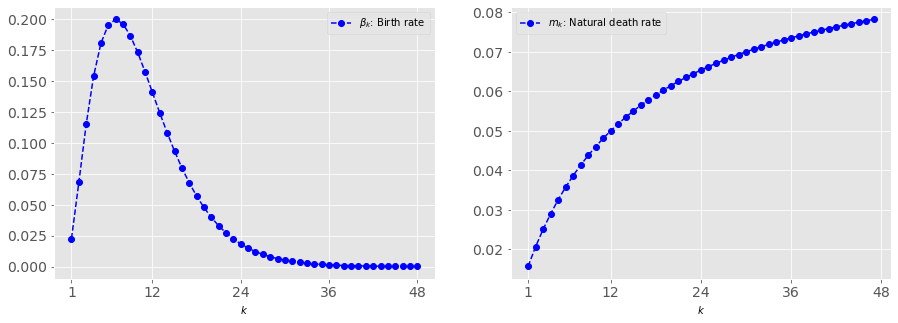

In [7]:
# Delta 1 = 1 month
N = 48
k0 = 7
C = 0.2

# Birth rate
k = np.arange(1,N+1)
betas = C*(k/k0)**2*np.exp(2*(1-k/k0))

# Natural death
m0 = 0.01
kd = 15
M = 0.1
mk = m0+(M-m0)*k[:-1]/(k[:-1]+kd)

plt.figure(figsize=(5,10))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey = False)

ax1.plot(k, betas, marker='o', linestyle='--', color='b',label=r'$\beta_k$: Birth rate')
ax1.set_xlabel('$k$')
ax1.set_xticks([1,12,24,36,48])
ax1.grid(True)
ax1.legend(loc='best')

ax2.plot(k[:-1], mk, marker='o', linestyle='--', color='b',label=r'$m_k$: Natural death rate')
ax2.set_xlabel('$k$')
ax2.set_xticks([1,12,24,36,48])
ax2.grid(True)
ax2.legend(loc='best')

plt.show()

### Algorithm

In [8]:
# Delta 1 = 1 month
N = 48
k0 = 10
C = 0.2

# Birth rate
k = np.arange(1,N+1)
betas = C*(k/k0)**2*np.exp(2*(1-k/k0))

# Natural death
m0 = 0.01
kd = 15
M = 0.1
mk = m0+(M-m0)*k[:-1]/(k[:-1]+kd)

def example1(J=1000, Phi = 0.3, Pstar = 5000):
    np.random.seed(0)
    # 1. Initialization
    p0 = np.zeros(N)
    p0[0] = 2000
    p1 = np.copy(p0)

    for j in np.arange(J):

        # 2. Compute Pk and update mu
        Pk = np.zeros(N-1)
        for i in range(N-1):
            Pk[i] = np.sum(p0[i+1:])
        nk = Phi*Pk/(Pk+Pstar)
        mus = mk+nk
        # Debugging
        if np.any(mus>1):
            print('j:',j)
            print('mk:',mk)
            print('nk:',nk)
            print('mus:',mus)

        # 3. Update matrix R
        R = np.diag(1-mus,-1)
        R[0,:] = betas

        # 4. Propagate distribution
        p1 = R @ p0

        # 5. Repeat
        p0 = np.copy(p1)
    
    plt.figure(figsize=(10,10))
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,5), sharey = False, sharex = True)
    
    ax1.plot(k, betas, marker='o', linestyle='--', color='b',label=r'$\beta_k$: Birth rate')
    #ax1.set_xlabel('$k$')
    #ax1.set_xticks([1,12,24,36,48])
    ax1.grid(True)
    ax1.legend(loc='best')

    ax2.plot(k[:-1], mk, marker='o', linestyle='--', color='b',label=r'$m_k$: Natural death rate')
    ax2.plot(k[:-1], nk, marker='o', linestyle='--', color='r',label=r'$n_k$: Death by cannibalism')
    #ax2.set_xlabel('$k$')
    #ax2.set_xticks([1,12,24,36,48])
    ax2.grid(True)
    ax2.legend(loc='best',fontsize=10)

    ax3.plot(k, p1, marker='o', linestyle='--', color='b',label=r'$p_k$: Population')
    ax3.set_xlabel('$k$')
    ax3.set_xticks([1,12,24,36,48])
    ax3.grid(True)
    ax3.legend(loc='best')

    ax4.plot(k[:-1], mus, marker='o', linestyle='--', color='b',label=r'$\mu_k$: Total death rate')
    ax4.set_xlabel('$k$')
    ax4.set_xticks([1,12,24,36,48])
    ax4.grid(True)
    ax4.legend(loc='best')

    plt.show()

interact(example1,J=(1,10000,1), Phi = (0,1,0.001), Pstar = (0,10000,1))

interactive(children=(IntSlider(value=1000, description='J', max=10000, min=1), FloatSlider(value=0.3, descrip…

<function __main__.example1(J=1000, Phi=0.3, Pstar=5000)>

In [9]:
Q = np.zeros((3,6))
Q[0,:] =[0, -3, 1, 0, -2, 1] 
Q[1,:] =[-1,0,-1,-2,0,0] 
Q[2,:] =[0,1,0,1,1,0]